# 6/21: EDA - Basic plotting, updating beliefs about Air Quality with Bayes

In [5]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta, binom
import numpy as np
import datetime as dt

In [6]:
#load data
data = pd.read_csv('../Data/data.csv')

In [7]:
data.shape

(1946059, 19)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946059 entries, 0 to 1946058
Data columns (total 19 columns):
Unnamed: 0         int64
issue date         object
valid date         object
valid time         object
time zone          object
record sequence    float64
data type          object
primary            object
reporting area     object
state code         object
latitude           float64
longitude          float64
pollutant          object
AQI value          float64
AQI category       object
action day         object
discussion         object
forecast source    object
urldate            int64
dtypes: float64(4), int64(2), object(13)
memory usage: 282.1+ MB


In [33]:
data.head()

,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate
0,06/01/17,05/31/17,NaN,PDT,-1.0,Y,Y,Aberdeen,WA,46.9725,-123.8317,PM2.5,11.0,Good,No,NaN,Olympic Region Clean Air Agency,20170601
1,06/01/17,06/01/17,21:00,PDT,0.0,O,Y,Aberdeen,WA,46.9725,-123.8317,PM2.5,10.0,Good,No,NaN,Olympic Region Clean Air Agency,20170601
2,05/31/17,06/01/17,NaN,EDT,1.0,F,Y,Adirondacks Region,NY,43.9700,-74.1600,OZONE,35.0,Good,No,NaN,New York Dept. of Environmental Conservation,20170601
3,05/31/17,06/01/17,NaN,EDT,1.0,F,N,Adirondacks Region,NY,43.9700,-74.1600,PM2.5,15.0,Good,No,NaN,New York Dept. of Environmental Conservation,20170601
4,06/02/17,06/01/17,NaN,EDT,-1.0,Y,Y,Adirondacks Region,NY,43.9700,-74.1600,OZONE,43.0,Good,No,NaN,New York Dept. of Environmental Conservation,20170601


In [9]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.shape

(1946059, 18)

In [10]:
data_ca = data[data['state code'] == 'CA']
data_ca.shape

(637156, 18)

In [11]:
data_sf = data[data['reporting area'] == 'San Francisco']
data_sf.shape

(3720, 18)

# Basic Plotting

/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


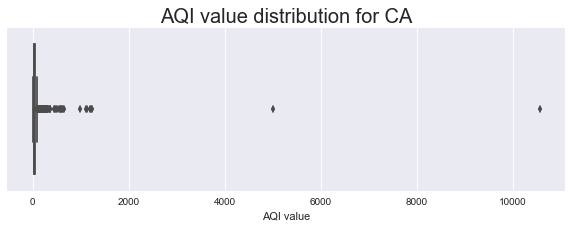

In [14]:
#plt.xlim(0, 2000)
#plt.hist(data['AQI value'].dropna());

fig = plt.figure(figsize = (10,3))
ax = sns.boxplot(data_ca['AQI value'].dropna());
ax.set_title('AQI value distribution for CA', fontsize = 20);

/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


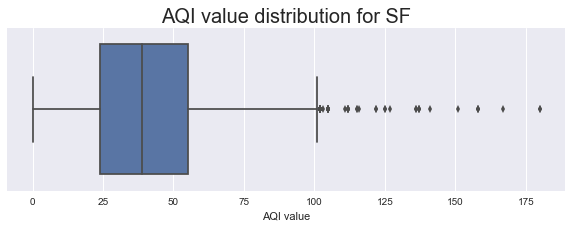

In [15]:
fig = plt.figure(figsize = (10,3))
ax = sns.boxplot(data_sf['AQI value'].dropna());
ax.set_title('AQI value distribution for SF', fontsize = 20);

In [94]:
#set key so plotting shows sorted AQI categories in order
aqicat = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
aqicat.reverse()
#print(aqicat)
mapping = {cat: i for i, cat in enumerate(aqicat)}
#mapping
key = data_ca['AQI category'].map(mapping)
key2 = data_sf['AQI category'].map(mapping)

data_cas = data_ca.iloc[key.argsort()]
data_sfs = data_sf.iloc[key2.argsort()]

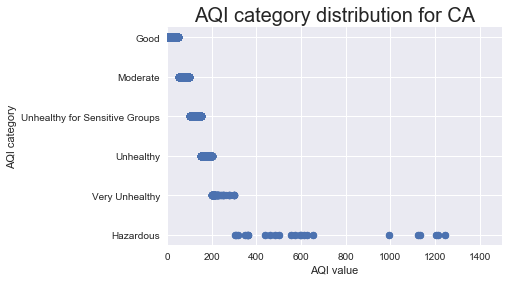

In [95]:
plt.scatter(data_cas['AQI value'], data_cas['AQI category']);
plt.xlim(0, 1500)
plt.title('AQI category distribution for CA', fontsize = 20);
plt.xlabel('AQI value');
plt.ylabel('AQI category');

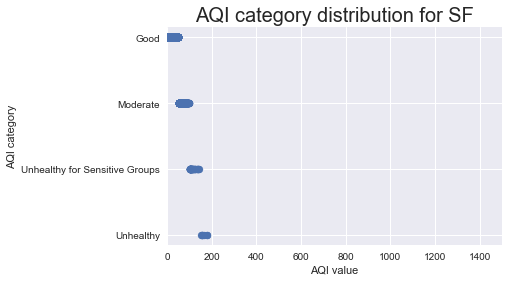

In [97]:
plt.scatter(data_sfs['AQI value'], data_sfs['AQI category']);
plt.xlim(0, 1500)
plt.title('AQI category distribution for SF', fontsize = 20);
plt.xlabel('AQI value');
plt.ylabel('AQI category');

In [106]:
display(np.round(data_cas.groupby(by=['AQI category'])['AQI value'].mean(), 1))
display(np.round(data_sfs.groupby(by=['AQI category'])['AQI value'].mean(), 1))

AQI category
Good                                29.1
Hazardous                         1190.3
Moderate                            66.8
Unhealthy                          165.8
Unhealthy for Sensitive Groups     118.1
Very Unhealthy                     216.3
Name: AQI value, dtype: float64

AQI category
Good                               29.4
Moderate                           61.8
Unhealthy                         164.6
Unhealthy for Sensitive Groups    112.0
Name: AQI value, dtype: float64

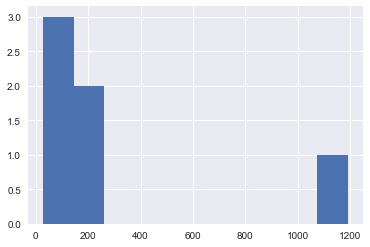

In [108]:
plt.hist(data_cas.groupby(by=['AQI category'])['AQI value'].mean());

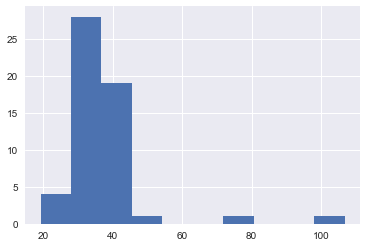

In [109]:
plt.hist(data.groupby(['state code'])['AQI value'].mean());

/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


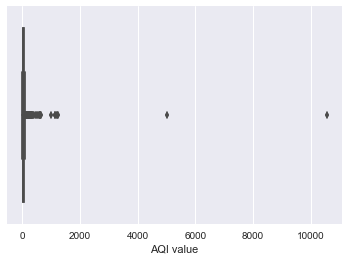

In [13]:
data['state code'].dropna().unique()
sns.boxplot(data[data['state code'] == 'CA']['AQI value']);

In [10]:
#Distro of AQI values by state

#fig = plt.figure(figsize = (10, 6))
#for i in data['state code'].dropna().unique():
    #print (i)   
    #ax = fig.add_subplot(10, 5, i+1)
    #sns.boxplot(data[data['state code'] == 'i']['AQI value']);

In [ ]:
# More visual EDA done in Tableau Public workbook given map data
    #Download Tableau workbook here: https://public.tableau.com/profile/helen2020#!/

# Updating Bayesian beliefs: starting with 50/50 Good vs Poor AQI days

In [32]:
data_ca['categorical'] = [1 if (cat == 'Good' or cat == 'Moderate') else 0 for cat in data_ca['AQI category']]
print(data_ca['categorical'].value_counts(), '\n\n', data_ca.shape)


1    616762
0     20394
Name: categorical, dtype: int64 

 (637156, 19)


/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
data_ca['valid date'] = pd.to_datetime(data_ca['valid date'])

In [ ]:
#June 2017 success/failure
data_ca[data_ca['valid date'].dt.month == 6][data_ca['valid date'].dt.year == 2017][data_ca['reporting area'] == 'Antelope Vly'][data_ca['data type'] == 'O'][data_ca['primary'] == 'Y']['categorical'].value_counts()


In [81]:
#July 2017 success/failure
data_ca[data_ca['valid date'].dt.month == 7][data_ca['valid date'].dt.year == 2017][data_ca['reporting area'] == 'Antelope Vly'][data_ca['data type'] == 'O'][data_ca['primary'] == 'Y']['categorical'].value_counts()


/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


1    17
0    14
Name: categorical, dtype: int64

In [85]:
#August 2017 success/failure
data_ca[data_ca['valid date'].dt.month == 8][data_ca['valid date'].dt.year == 2017][data_ca['reporting area'] == 'Antelope Vly'][data_ca['data type'] == 'O'][data_ca['primary'] == 'Y']['categorical'].value_counts()


/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


1    24
0     7
Name: categorical, dtype: int64

In [161]:
#September 2017 success/failure
data_ca[data_ca['valid date'].dt.month == 9][data_ca['valid date'].dt.year == 2017][data_ca['reporting area'] == 'Antelope Vly'][data_ca['data type'] == 'O'][data_ca['primary'] == 'Y']['categorical'].value_counts()

data_ca[data_ca['valid date'].dt.month == 9][data_ca['valid date'].dt.year == 2017][data_ca['reporting area'] == 'Antelope Vly'][data_ca['data type'] == 'O'][data_ca['primary'] == 'Y']


/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Unnamed: 0,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate,categorical
474110,474111,09/01/17,2017-09-01,21:00,PDT,0.0,O,Y,Antelope Vly,CA,34.6694,-118.1305,OZONE,49.0,Good,No,NaN,Antelope Valley AQMD,20170901,1
480405,480406,09/02/17,2017-09-02,21:00,PDT,0.0,O,Y,Antelope Vly,CA,34.6694,-118.1305,PM2.5,132.0,Unhealthy for Sensitive Groups,No,NaN,Antelope Valley AQMD,20170902,0
486120,486121,09/03/17,2017-09-03,21:00,PDT,0.0,O,Y,Antelope Vly,CA,34.6694,-118.1305,PM2.5,57.0,Moderate,No,NaN,Antelope Valley AQMD,20170903,1
491289,491290,09/04/17,2017-09-04,21:00,PDT,0.0,O,Y,Antelope Vly,CA,34.6694,-118.1305,PM2.5,45.0,Good,No,NaN,Antelope Valley AQMD,20170904,1
496129,496130,09/05/17,2017-09-05,21:00,PDT,0.0,O,Y,Antelope Vly,CA,34.6694,-118.1305,OZONE,39.0,Good,No,NaN,Antelope Valley AQMD,20170905,1
501231,501232,09/06/17,2017-09-06,21:00,PDT,0.0,O,Y,Antelope Vly,CA,34.6694,-118.1305,OZONE,42.0,Good,No,NaN,Antelope Valley AQMD,20170906,1
506317,506318,09/07/17,2017-09-07,21:00,PDT,0.0,O,Y,Antelope Vly,CA,34.6694,-118.1305,OZONE,84.0,Moderate,No,NaN,Antelope Valley AQMD,20170907,1
511550,511551,09/08/17,2017-09-08,21:00,PDT,0.0,O,Y,Antelope Vly,CA,34.6694,-118.1305,OZONE,54.0,Moderate,No,NaN,Antelope Valley AQMD,20170908,1
517449,517450,09/09/17,2017-09-09,21:00,PDT,0.0,O,Y,Antelope Vly,CA,34.6694,-118.1305,OZONE,44.0,Good,No,NaN,Antelope Valley AQMD,20170909,1
522774,522775,09/10/17,2017-09-10,21:00,PDT,0.0,O,Y,Antelope Vly,CA,34.6694,-118.1305,OZONE,41.0,Good,No,NaN,Antelope Valley AQMD,20170910,1


In [112]:
#October 2017 success/failure
data_ca[data_ca['valid date'].dt.month == 10][data_ca['valid date'].dt.year == 2017][data_ca['reporting area'] == 'Antelope Vly'][data_ca['data type'] == 'O'][data_ca['primary'] == 'Y']['categorical'].value_counts()


/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


1    30
0     1
Name: categorical, dtype: int64

In [115]:
#November 2017 success/failure
data_ca[data_ca['valid date'].dt.month == 11][data_ca['valid date'].dt.year == 2017][data_ca['reporting area'] == 'Antelope Vly'][data_ca['data type'] == 'O'][data_ca['primary'] == 'Y']['categorical'].value_counts()


/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


1    31
Name: categorical, dtype: int64

In [116]:
#December 2017 success/failure
data_ca[data_ca['valid date'].dt.month == 12][data_ca['valid date'].dt.year == 2017][data_ca['reporting area'] == 'Antelope Vly'][data_ca['data type'] == 'O'][data_ca['primary'] == 'Y']['categorical'].value_counts()


/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


1    30
Name: categorical, dtype: int64

In [167]:
data['']

,categorical
1,30


In [170]:
months = [6, 7, 8, 9, 10, 11, 12]
for month in months:
    data=pd.DataFrame(data_ca[data_ca['valid date'].dt.month == month][data_ca['valid date'].dt.year == 2017][data_ca['reporting area'] == 'Antelope Vly'][data_ca['data type'] == 'O'][data_ca['primary'] == 'Y']['categorical'].value_counts())
    print(data)


/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


   categorical
1           17
0           13
   categorical
1           17
0           14
   categorical
1           24
0            7
   categorical
1           23
0            2
   categorical
1           30
0            1
   categorical
1           31
   categorical
1           30


In [190]:
months
good_days = pd.Series([17, 17, 24, 23, 30, 31, 30])
notgood_days = pd.Series([13, 14, 7, 7, 1, 0, 0])
mth_days = pd.Series([30, 31, 31, 30, 31, 31, 30])
data=pd.DataFrame([notgood_days, good_days, mth_days])
data.rename({0: 'June', 1: 'July', 2: 'August', 3: 'September', 4: 'October', 5: 'November', 6: 'December'}, axis = 1, inplace = True)
data.rename({0: 'Poor AQI Days', 1: 'Good AQI Days', 2: 'Days in Month'})

,June,July,August,September,October,November,December
Poor AQI Days,13,14,7,7,1,0,0
Good AQI Days,17,17,24,23,30,31,30
Days in Month,30,31,31,30,31,31,30


# Bayes Prior 0

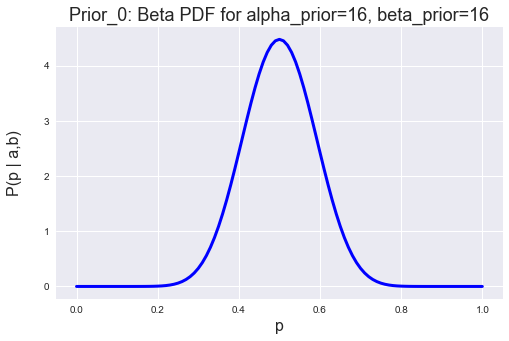

In [34]:
#Prior: uninformative - assume 50/50 distribution between good/bad starting out (15/30 days in month)
successes = 15
failures = 15

alpha_prior = successes+1
beta_prior = failures+1

beta_dist = beta(alpha_prior, beta_prior)

pvals = np.linspace(0, 1, 101)
beta_vals_prior = beta_dist.pdf(pvals)
#------

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(pvals, beta_vals_prior, 'b', lw=3)
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(p | a,b)\n', fontsize=16)
ax.set_title(f'Prior_0: Beta PDF for alpha_prior={alpha_prior}, beta_prior={beta_prior}', fontsize=18)
plt.show()

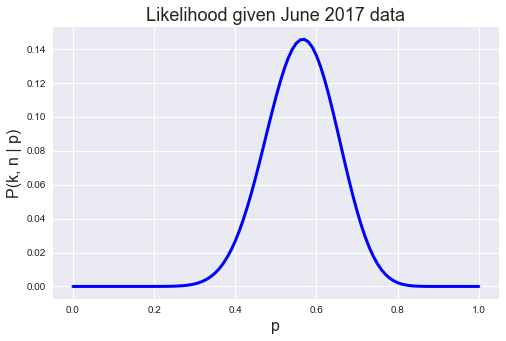

Max Likelihood =  0.5666666666666667


In [35]:
#Likelihood: data from first month of data = June 2017 (30 days), success = good
n = 30
k = 17

likelihood = []
for p in pvals:
    binomial = binom(n, p)
    likelihood.append(binomial.pmf(k))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(pvals, likelihood, 'b', lw=3)
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(k, n | p)', fontsize=16)
ax.set_title(f'Likelihood given June 2017 data', fontsize=18)
plt.show()

print('Max Likelihood = ', k/n)

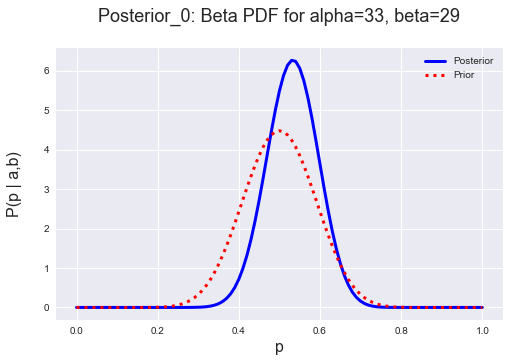

In [36]:
#Posterior:
alpha_posterior = k + alpha_prior
beta_posterior = n - k + beta_prior

beta_dist = beta(alpha_posterior, beta_posterior)
beta_vals_posterior = beta_dist.pdf(pvals)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pvals, beta_vals_posterior, 'b', lw=3, label='Posterior')
ax.plot(pvals, beta_vals_prior, 'r:', lw=3, label='Prior')
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(p | a,b)\n', fontsize=16)
ax.set_title('Posterior_0: Beta PDF for alpha={}, beta={}\n'.format(alpha_posterior, beta_posterior), fontsize=18)
ax.legend()
plt.show()

# Prior 1

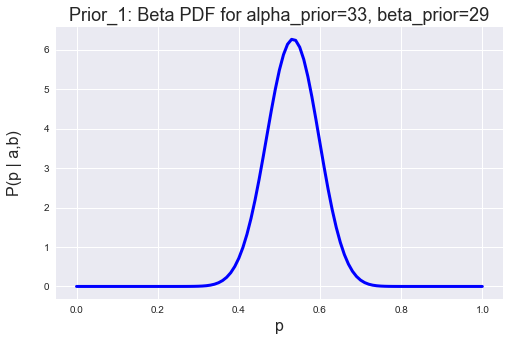

In [38]:
#Prior:

#iter1
#successes = 15
#failures = 15

#alpha_prior = successes+1
#beta_prior = failures+1

#iter2: prior = posterior from above
alpha_prior = alpha_posterior
beta_prior = beta_posterior

beta_dist = beta(alpha_prior, beta_prior)

pvals = np.linspace(0, 1, 101)
beta_vals_prior = beta_dist.pdf(pvals)
#------

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(pvals, beta_vals_prior, 'b', lw=3)
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(p | a,b)\n', fontsize=16)
ax.set_title(f'Prior_1: Beta PDF for alpha_prior={alpha_prior}, beta_prior={beta_prior}', fontsize=18)
plt.show()

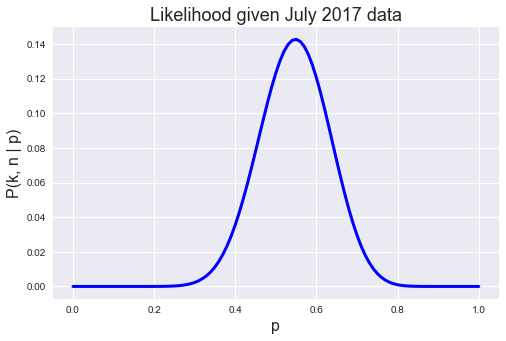

Max Likelihood =  0.5483870967741935


In [39]:
#Likelihood: data from second month of data = July 2017 (31 days), success = good
n = 31
k = 17

likelihood = []
for p in pvals:
    binomial = binom(n, p)
    likelihood.append(binomial.pmf(k))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(pvals, likelihood, 'b', lw=3)
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(k, n | p)', fontsize=16)
ax.set_title(f'Likelihood given July 2017 data', fontsize=18)
plt.show()

print('Max Likelihood = ', k/n)

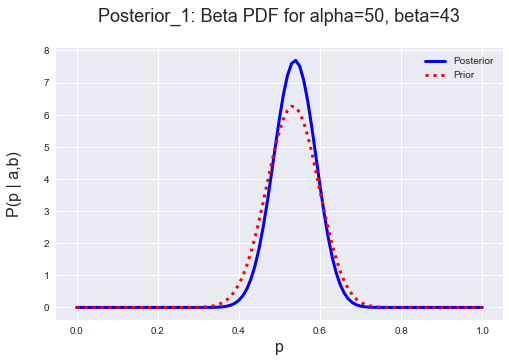

In [40]:
#Posterior:
alpha_posterior = k + alpha_prior
beta_posterior = n - k + beta_prior

beta_dist = beta(alpha_posterior, beta_posterior)
beta_vals_posterior = beta_dist.pdf(pvals)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pvals, beta_vals_posterior, 'b', lw=3, label='Posterior')
ax.plot(pvals, beta_vals_prior, 'r:', lw=3, label='Prior')
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(p | a,b)\n', fontsize=16)
ax.set_title('Posterior_1: Beta PDF for alpha={}, beta={}\n'.format(alpha_posterior, beta_posterior), fontsize=18)
ax.legend()
plt.show()

# Prior 2

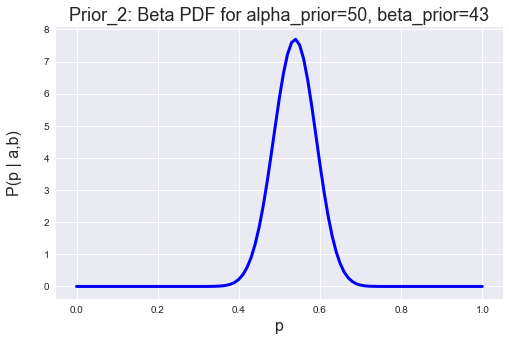

In [41]:
#Prior:

#iter1
#successes = 15
#failures = 15

#alpha_prior = successes+1
#beta_prior = failures+1

#iter2: prior = posterior from iter1
#iter3: prior = posterior from above
alpha_prior = alpha_posterior
beta_prior = beta_posterior

beta_dist = beta(alpha_prior, beta_prior)

pvals = np.linspace(0, 1, 101)
beta_vals_prior = beta_dist.pdf(pvals)
#------

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(pvals, beta_vals_prior, 'b', lw=3)
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(p | a,b)\n', fontsize=16)
ax.set_title(f'Prior_2: Beta PDF for alpha_prior={alpha_prior}, beta_prior={beta_prior}', fontsize=18)
plt.show()

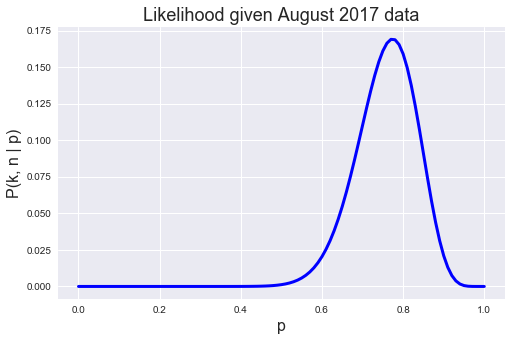

Max Likelihood =  0.7741935483870968


In [202]:
#Likelihood: data from second month of data = August 2017 (31 days), success = good
n = 31
k = 24

likelihood = []
for p in pvals:
    binomial = binom(n, p)
    likelihood.append(binomial.pmf(k))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(pvals, likelihood, 'b', lw=3)
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(k, n | p)', fontsize=16)
ax.set_title(f'Likelihood given August 2017 data', fontsize=18)
plt.show()

print('Max Likelihood = ', k/n)

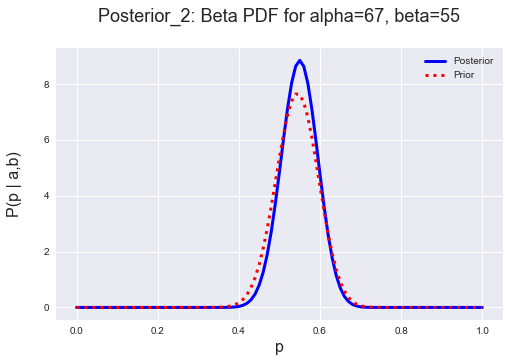

In [31]:
#Posterior:
alpha_posterior = k + alpha_prior
beta_posterior = n - k + beta_prior

beta_dist = beta(alpha_posterior, beta_posterior)
beta_vals_posterior = beta_dist.pdf(pvals)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pvals, beta_vals_posterior, 'b', lw=3, label='Posterior')
ax.plot(pvals, beta_vals_prior, 'r:', lw=3, label='Prior')
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(p | a,b)\n', fontsize=16)
ax.set_title('Posterior_2: Beta PDF for alpha={}, beta={}\n'.format(alpha_posterior, beta_posterior), fontsize=18)
ax.legend()
plt.show()

# Prior 3

In [230]:
#defining functions
def prior(a_prior = alpha_posterior, b_prior = beta_posterior):
    beta_dist = beta(a_prior, b_prior)
    pvals = np.linspace(0, 1, 101)
    beta_vals_prior = beta_dist.pdf(pvals)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(pvals, beta_vals_prior, 'b', lw=3)
    ax.set_xlabel('p', fontsize=16)
    ax.set_ylabel('P(p | a,b)\n', fontsize=16)
    ax.set_title(f'Prior: Beta PDF for alpha_prior={a_prior}, beta_prior={b_prior}', fontsize=18)
    plt.show()

In [205]:
alpha_posterior, beta_posterior

(74, 50)

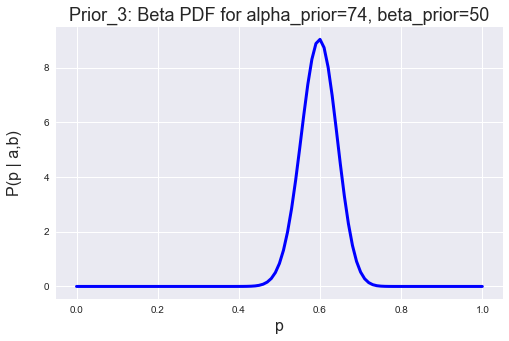

In [206]:
prior()

In [231]:
def likelihood(n, k):
    likelihood = []
    for p in pvals:
        binomial = binom(n, p)
        likelihood.append(binomial.pmf(k))

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(pvals, likelihood, 'b', lw=3)
    ax.set_xlabel('p', fontsize=16)
    ax.set_ylabel('P(k, n | p)', fontsize=16)
    ax.set_title(f'Likelihood given data', fontsize=18)
    plt.show()

    print('Max Likelihood = ', k/n)

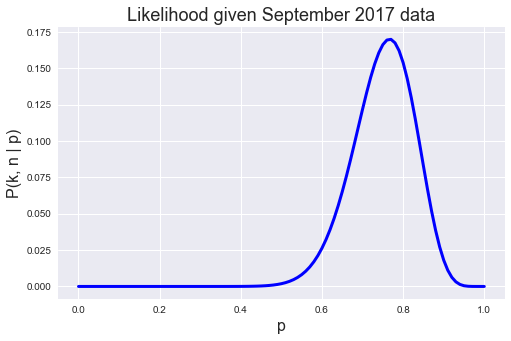

Max Likelihood =  0.7666666666666667


In [208]:
#September 2017: 23/30
likelihood(30, 23)

In [250]:
def posterior(a_prior, b_prior, n, k):
    a_post = k + a_prior
    b_post = n - k + b_prior
    
    beta_dist_prior = beta(a_prior, b_prior)
    beta_vals_prior = beta_dist_prior.pdf(pvals)
    
    beta_dist_posterior = beta(a_post, b_post)
    beta_vals_posterior = beta_dist_posterior.pdf(pvals)
    print(pvals[np.argmax(beta_vals_posterior)], np.max(beta_vals_posterior))
    fig, ax = plt.subplots(figsize=(8, 5))

    ax.plot(pvals, beta_vals_posterior, 'b', lw=3, label='Posterior')
    ax.plot(pvals, beta_vals_prior, 'r:', lw=3, label='Prior')
    ax.set_xlabel('p', fontsize=16)
    ax.set_ylabel('P(p | a,b)\n', fontsize=16)
    ax.set_title('Posterior: Beta PDF for alpha_post={}, beta_post={}\n'.format(a_post, b_post), fontsize=18)
    ax.legend()
    plt.show()

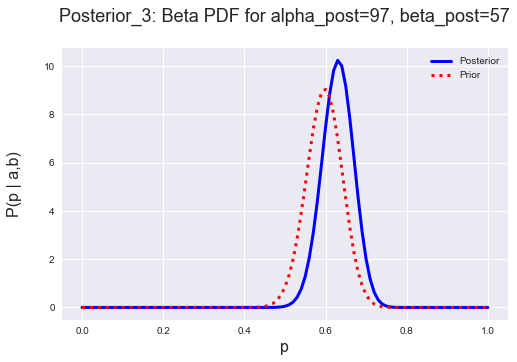

In [210]:
posterior(74, 50, 30, 23)

# Prior 4

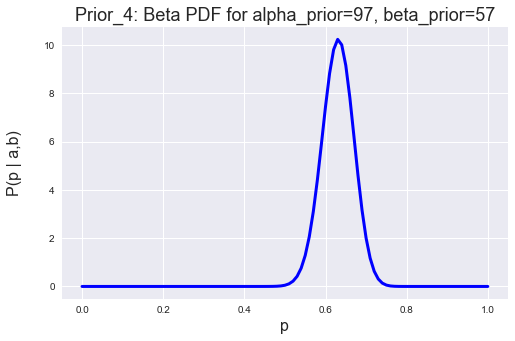

In [216]:
prior(97, 57)

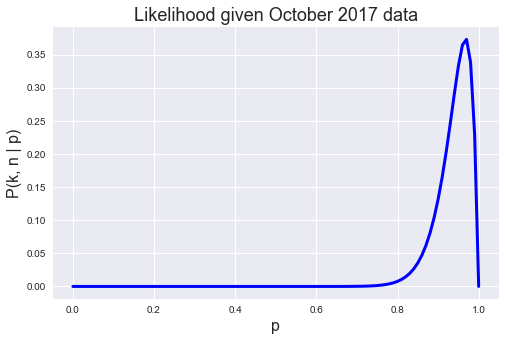

Max Likelihood =  0.967741935483871


In [218]:
#October 2017 data
likelihood(31, 30)

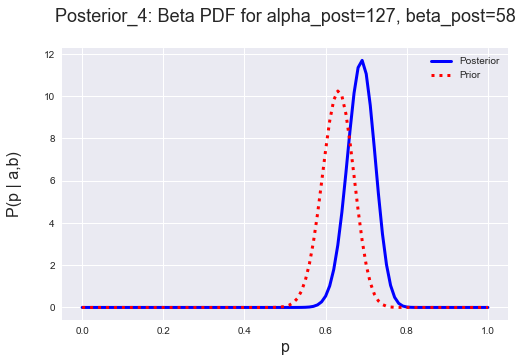

In [220]:
posterior(97, 57, 31, 30)

# Prior 5

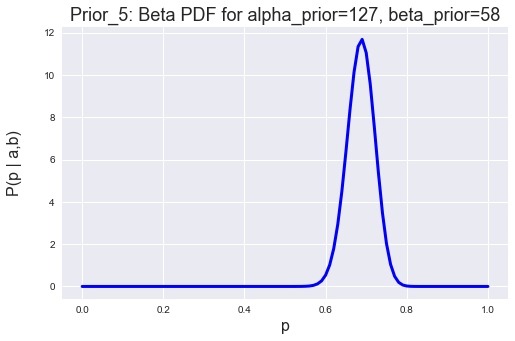

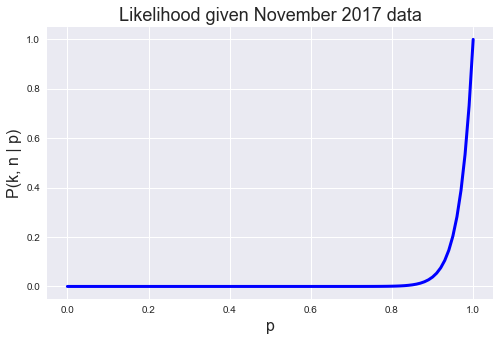

Max Likelihood =  1.0


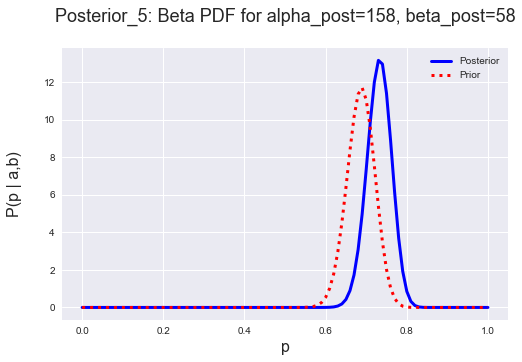

In [225]:
prior(127, 58)
likelihood(31, 31)    #November 2017 data
posterior(127, 58, 31, 31)


# Prior 6

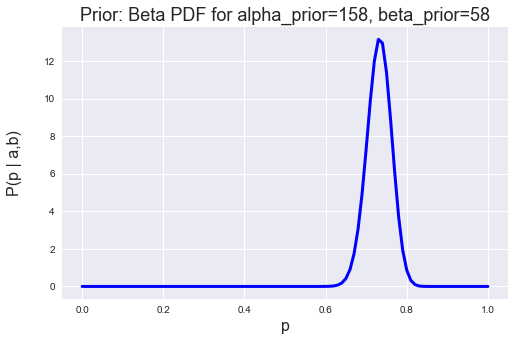

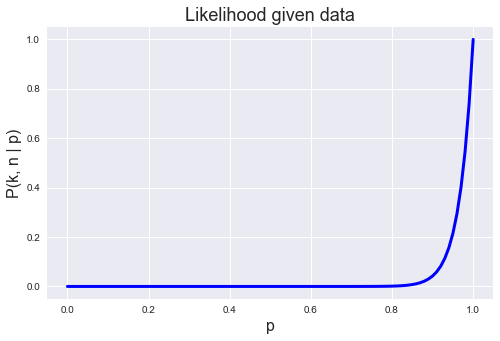

Max Likelihood =  1.0
0.77 14.633741712678084


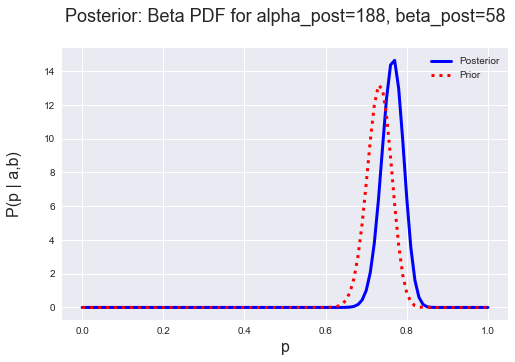

In [251]:
prior(158, 58)
likelihood(30, 30)    #December 2017 data
posterior(158, 58, 30, 30)